In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/dataframe.csv',index_col=0)

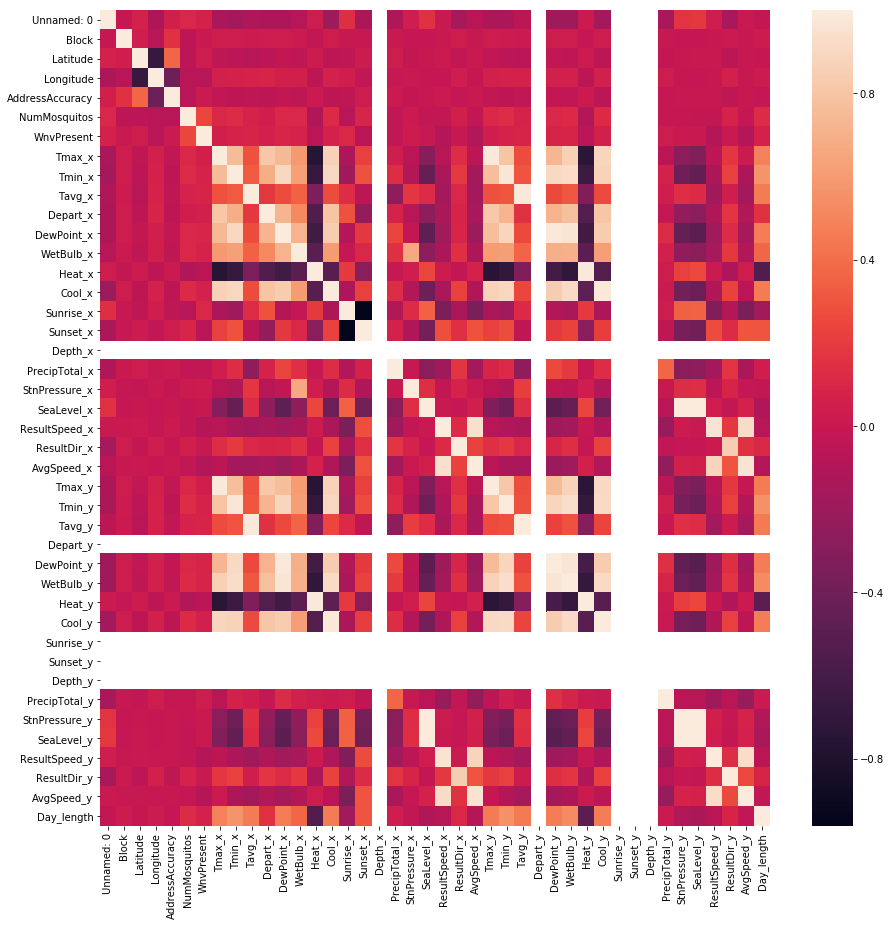

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

In [8]:
df.columns

Index(['Address', 'Species', 'Street', 'Trap', 'AddressNumberAndStreet',
       'NumMosquitos', 'WnvPresent', 'Day_length', 'Tmax', 'Tmin', 'Tavg',
       'Day_length_shift', 'Tavg_shift', 'ResultSpeed', 'ResultSpeed_shift',
       'ResultDir', 'AvgSpeed', 'ResultDir_shift', 'AvgSpeed_shift', 'Sunset',
       'Sunrise', 'Heat', 'Depart', 'DewPoint', 'WetBulb', 'Cool', 'CodeSum',
       'PrecipTotal', 'StnPressure'],
      dtype='object')

In [12]:
grouped_traps = df.groupby(['Date','Trap','Species'])[['NumMosquitos', 'WnvPresent']].sum()

In [16]:
flat_groups = grouped_traps.reset_index().set_index('Date')

In [19]:
flat_groups['WnvPresent'] = flat_groups['WnvPresent'].map(lambda x: int(x > 0))

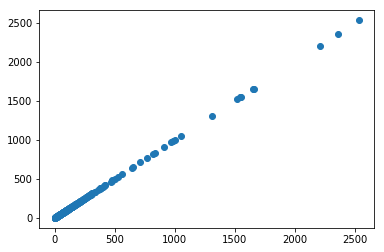

In [26]:
plt.scatter(flat_groups.NumMosquitos.value_counts().index, flat_groups.NumMosquitos.value_counts().index)

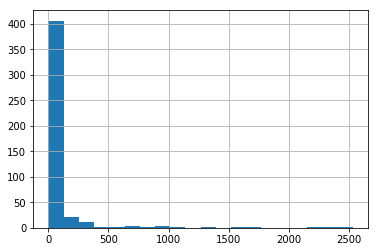

In [36]:
flat_groups[flat_groups['WnvPresent']==1].NumMosquitos.hist(bins=20)

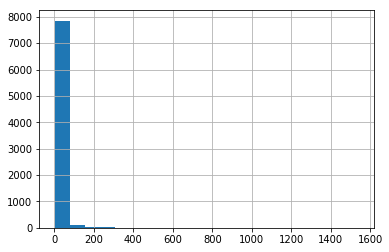

In [37]:
flat_groups[flat_groups['WnvPresent']==0].NumMosquitos.hist(bins=20)